In [1]:

import torch
from torch import nn
from torch import optim

from torchsummary import summary
import imageVisualizationHelper 
from dilationNeuralNetwork import DilationNeuralNetwork
import commonHelper
import trainLoopHelper
import testLoopHelper
import datasetProvider

In [2]:
DATA_FOLDER = "../../data"
from torch.utils.data import Dataset
image_classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
device = commonHelper.get_device(use_seed=True)

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

---->TRAINING data with transform


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


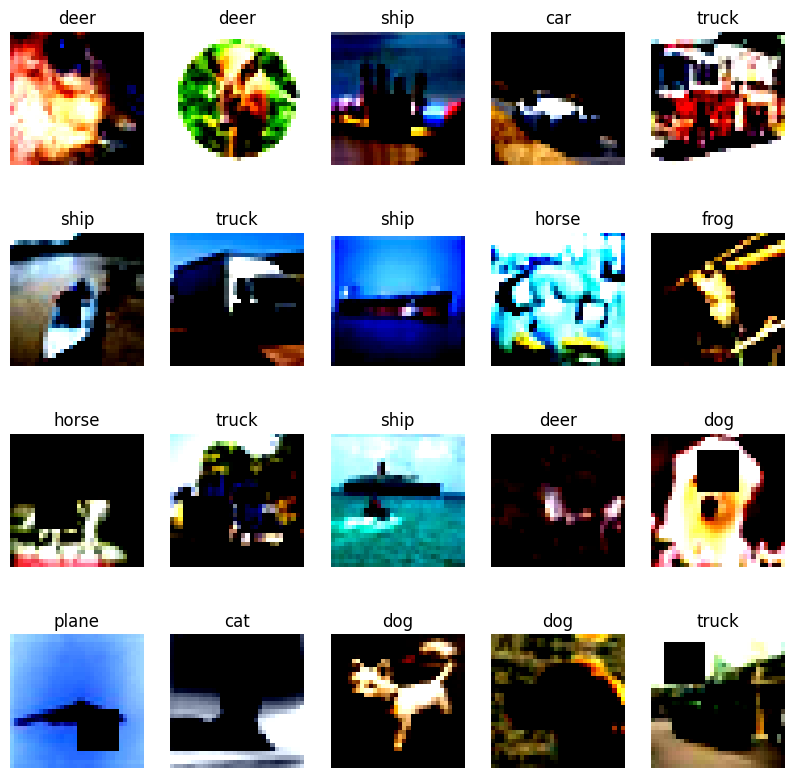

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

---->TEST data with transform


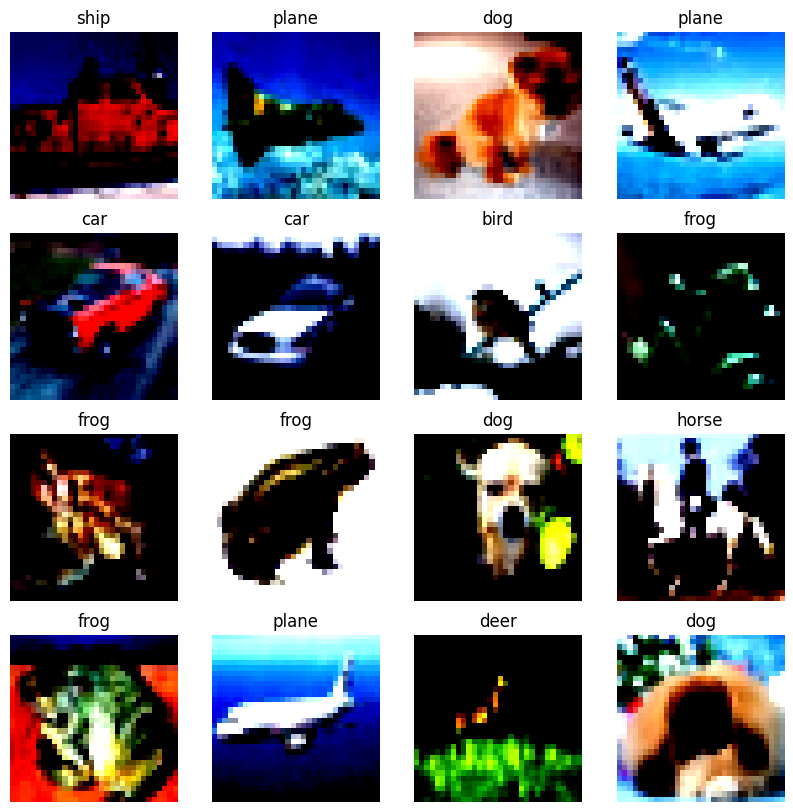

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


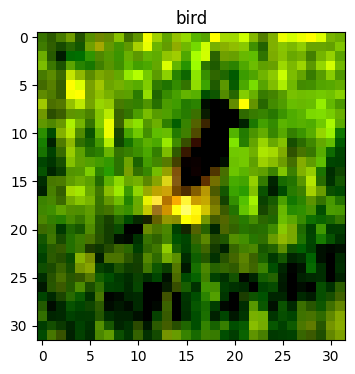

In [3]:

# Download training data from open datasets.

train_transforms_collection = []
train_transforms_collection.append(datasetProvider.create_flip_transformation(is_horizontal=True))
train_transforms_collection.append(datasetProvider.create_shift_scale_rotate_transform(shift_limit=0.1, scale_limit=0.1, rotate_limit=10))
train_transforms_collection.append(datasetProvider.create_random_crop_transformation(max_height=10, max_width=10, fill_value=[0,0,0]))
train_transforms_collection.extend(datasetProvider.create_basic_transforms_collection())

train_transforms = datasetProvider.compose_custom_transforms(train_transforms_collection)
test_transforms = datasetProvider.compose_custom_transforms(datasetProvider.create_basic_transforms_collection())

train_dataset, test_dataset = datasetProvider.get_CIFAR10_datasets(train_transforms_collection=train_transforms,
                                                                   test_transforms_collection=test_transforms,
                                                                    data_folder=DATA_FOLDER)

print("---->TRAINING data with transform")
imageVisualizationHelper.randomly_show_images_from_tensor_array(train_dataset, image_classes, rows=4, cols=5)


print("---->TEST data with transform")
imageVisualizationHelper.randomly_show_images_from_tensor_array(test_dataset, image_classes, rows=4, cols=4)

# Show single image
sample_idx = torch.randint(0, len(test_dataset), size=(1,))  
image_data, label = test_dataset[sample_idx.item()]
imageVisualizationHelper.show_image(image_data, image_classes[label])


In [4]:

BATCH_SIZE = 256
train_dataloader, test_dataloader = datasetProvider.get_dataloaders(train_dataset=train_dataset,
                                                                    test_dataset=test_dataset,
                                                                    batch_size=BATCH_SIZE)
                                                                    


Shape of test_dataloader batch_data [Batch, C, H, W]: torch.Size([256, 3, 32, 32])
Shape of test_dataloader label (label): torch.Size([256]) torch.int64
Labels for a batch of size 256 are tensor([4, 5, 8, 3, 3, 2, 8, 6, 7, 1, 0, 0, 7, 7, 7, 3, 4, 2, 3, 2, 5, 6, 4, 2,
        1, 6, 6, 6, 3, 8, 6, 0, 5, 9, 6, 4, 9, 7, 1, 6, 7, 0, 9, 8, 8, 5, 6, 1,
        3, 0, 0, 0, 2, 9, 2, 3, 2, 6, 3, 7, 0, 6, 9, 2, 4, 5, 1, 8, 1, 5, 9, 9,
        0, 4, 9, 3, 9, 4, 5, 0, 9, 4, 6, 0, 3, 1, 7, 2, 6, 3, 4, 5, 9, 0, 1, 4,
        0, 3, 2, 9, 4, 4, 5, 3, 1, 4, 4, 6, 8, 3, 7, 1, 1, 2, 0, 7, 4, 6, 9, 0,
        1, 6, 2, 3, 2, 0, 9, 7, 0, 9, 4, 3, 1, 1, 9, 9, 0, 7, 4, 0, 5, 2, 7, 8,
        9, 6, 9, 0, 2, 6, 6, 5, 6, 8, 6, 3, 6, 8, 7, 6, 9, 4, 6, 6, 7, 0, 5, 3,
        9, 0, 4, 3, 5, 8, 6, 3, 5, 7, 4, 0, 7, 8, 5, 5, 1, 3, 1, 8, 2, 6, 0, 0,
        6, 1, 5, 9, 0, 2, 7, 0, 8, 0, 6, 4, 4, 0, 8, 3, 2, 9, 6, 9, 4, 9, 1, 1,
        5, 4, 8, 8, 8, 5, 3, 8, 7, 9, 4, 9, 9, 6, 1, 6, 1, 7, 6, 9, 5, 5, 8, 2,
        5, 6

In [5]:
def get_model_instance(index=1, input_size=(3,32,32)) -> nn.Module:
    if(index <= 1 ):
        model = DilationNeuralNetwork(drop_out=0.1).to(device=device)
        summary(model=model, input_size=input_size)
        return model


model = get_model_instance(index=1)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
              ReLU-2           [-1, 64, 32, 32]               0
       BatchNorm2d-3           [-1, 64, 32, 32]             128
           Dropout-4           [-1, 64, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          36,864
              ReLU-6           [-1, 64, 32, 32]               0
       BatchNorm2d-7           [-1, 64, 32, 32]             128
           Dropout-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 64, 30, 30]          36,864
             ReLU-10           [-1, 64, 30, 30]               0
      BatchNorm2d-11           [-1, 64, 30, 30]             128
          Dropout-12           [-1, 64, 30, 30]               0
       BasicBlock-13           [-1, 64, 30, 30]               0
           Conv2d-14           [-1, 32,

In [6]:
def get_correct_prediction_count(predictions : torch.Tensor, valid_labels):
  # torch.argmax locates the indices of the maximum elements within a tensor.
  # It does this along a specified dimension (axis).
  return predictions.argmax(dim=1).eq(valid_labels).sum().item()

In [7]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []

train_accuracy = []
test_accuracy = []

MAX_IMAGES_FOR_DISPLAY = 20

correctly_predicted_trained_images = []
wrongly_predicted_trained_images = []

correctly_predicted_test_images = []
wrongly_predicted_test_images = []

In [8]:

def train_loop(dataloader, model, loss_fn, optimizer : optim.Optimizer):
    batch_train_accuracy, batch_train_losses, correctly_predicted_images, wrongly_predicted_images = trainLoopHelper.train_loop(dataloader, model, loss_fn, optimizer)
    train_accuracy.append(batch_train_accuracy)
    train_losses.append(batch_train_losses)

    if(len(correctly_predicted_trained_images) < MAX_IMAGES_FOR_DISPLAY):
        correctly_predicted_trained_images.extend(correctly_predicted_images)

    if(len(wrongly_predicted_trained_images) < MAX_IMAGES_FOR_DISPLAY):
        wrongly_predicted_trained_images.extend(wrongly_predicted_images)


In [9]:


def test_loop(dataloader, model, loss_fn):

        batch_test_accuracy, batch_test_losses, correctly_predicted_images, wrongly_predicted_images = testLoopHelper.test_loop(dataloader, model, loss_fn)
        test_accuracy.append(batch_test_accuracy)
        test_losses.append(batch_test_losses)

        if(len(correctly_predicted_test_images) < MAX_IMAGES_FOR_DISPLAY):
            correctly_predicted_test_images.extend(correctly_predicted_images)

        if(len(wrongly_predicted_test_images) < MAX_IMAGES_FOR_DISPLAY):
            wrongly_predicted_test_images.extend(wrongly_predicted_images)


In [10]:
LEARNING_RATE = 0.09
EPOCHS = 25
MOMENTUM = 0.85

correctly_predicted_trained_images = []
wrongly_predicted_trained_images = []
correctly_predicted_test_images = []
wrongly_predicted_test_images = []


loss_fn = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM, weight_decay=0)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5, verbose=True)


for t in range(EPOCHS):
    print(f"Epoch {t+1}")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
    scheduler.step()

print("Done!")

c:\Users\1430647\Anaconda3\envs\cuda\lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch 1


Train: Loss=2.3273 Batch_id=1 Accuracy=9.96:   1%|          | 1/196 [00:18<1:01:07, 18.81s/it]

Train loop parameters shapes
 Shape of data : torch.Size([256, 3, 32, 32]), label: torch.Size([256])
Shape of predicted data : torch.Size([256, 10])
labels : tensor([6, 9, 5, 9, 1, 5, 0, 0, 8, 7, 2, 9, 1, 9, 3, 6, 4, 7, 5, 4, 1, 3, 3, 8,
        9, 9, 8, 9, 5, 4, 6, 0, 5, 1, 3, 8, 1, 0, 4, 8, 6, 4, 2, 7, 6, 1, 6, 1,
        6, 8, 2, 3, 1, 9, 4, 4, 4, 5, 7, 0, 4, 1, 7, 7, 4, 4, 9, 9, 4, 6, 1, 9,
        0, 3, 3, 2, 8, 3, 2, 5, 2, 4, 8, 6, 8, 9, 9, 2, 0, 7, 9, 6, 7, 6, 2, 6,
        6, 5, 7, 8, 3, 7, 4, 8, 1, 8, 2, 2, 7, 8, 1, 6, 7, 6, 2, 6, 2, 6, 6, 4,
        6, 5, 4, 7, 3, 3, 9, 7, 4, 4, 6, 8, 8, 7, 0, 2, 7, 4, 2, 1, 9, 1, 0, 1,
        9, 0, 0, 2, 3, 3, 1, 1, 6, 9, 6, 5, 4, 0, 7, 4, 8, 7, 4, 0, 1, 2, 5, 8,
        8, 0, 5, 9, 7, 9, 6, 9, 7, 9, 2, 0, 1, 4, 2, 4, 8, 7, 0, 5, 5, 7, 6, 2,
        1, 1, 9, 7, 3, 2, 0, 0, 0, 5, 0, 9, 5, 9, 1, 6, 8, 0, 9, 6, 7, 6, 7, 2,
        0, 9, 5, 3, 4, 1, 8, 1, 8, 8, 6, 2, 2, 8, 5, 7, 0, 7, 1, 0, 8, 9, 4, 8,
        4, 8, 7, 4, 8, 0, 1, 7, 1, 0, 8, 2

Train: Loss=1.5648 Batch_id=195 Accuracy=29.54: 100%|██████████| 196/196 [00:34<00:00,  5.69it/s]


Test loop parameters shapes
 Shape of data : torch.Size([256, 3, 32, 32]), label: torch.Size([256])
Shape of predicted data : torch.Size([256, 10])
labels : tensor([4, 6, 1, 5, 1, 0, 3, 4, 7, 5, 7, 1, 5, 7, 1, 8, 1, 4, 9, 5, 2, 3, 0, 8,
        9, 1, 5, 2, 0, 0, 0, 5, 9, 8, 0, 2, 1, 7, 1, 6, 1, 0, 4, 7, 3, 6, 7, 8,
        0, 3, 4, 2, 5, 0, 3, 9, 1, 9, 8, 9, 9, 0, 3, 4, 6, 7, 0, 3, 8, 4, 0, 4,
        3, 1, 9, 0, 8, 9, 6, 5, 8, 0, 1, 8, 4, 7, 2, 1, 5, 8, 4, 2, 8, 7, 8, 5,
        3, 2, 8, 8, 9, 2, 1, 5, 7, 8, 6, 0, 2, 3, 8, 2, 2, 0, 8, 4, 5, 9, 4, 8,
        6, 9, 8, 5, 2, 7, 4, 8, 2, 6, 3, 3, 0, 0, 7, 5, 0, 9, 5, 9, 7, 4, 9, 4,
        0, 3, 5, 5, 3, 5, 6, 9, 8, 2, 1, 7, 8, 1, 8, 5, 4, 1, 5, 0, 0, 2, 5, 5,
        4, 6, 1, 3, 5, 4, 2, 6, 9, 2, 1, 1, 4, 8, 5, 3, 7, 4, 1, 5, 6, 3, 7, 8,
        2, 4, 1, 0, 2, 0, 7, 9, 6, 2, 7, 0, 4, 4, 4, 9, 9, 7, 9, 0, 5, 1, 2, 0,
        0, 0, 6, 0, 8, 8, 9, 7, 5, 8, 3, 6, 6, 4, 4, 6, 1, 8, 7, 6, 8, 3, 1, 2,
        9, 9, 6, 9, 3, 7, 1, 0, 8, 8, 1, 7,

Train: Loss=1.2169 Batch_id=195 Accuracy=45.22: 100%|██████████| 196/196 [00:36<00:00,  5.40it/s]


Test set: Average loss: 52.3905, Accuracy: 5107/10000 (51.07%)

Epoch 3


Train: Loss=1.2474 Batch_id=195 Accuracy=53.14: 100%|██████████| 196/196 [00:36<00:00,  5.42it/s]


Test set: Average loss: 50.7859, Accuracy: 5456/10000 (54.56%)

Epoch 4


Train: Loss=1.1749 Batch_id=195 Accuracy=57.95: 100%|██████████| 196/196 [00:36<00:00,  5.38it/s]


Test set: Average loss: 41.5803, Accuracy: 6274/10000 (62.74%)

Epoch 5


Train: Loss=1.1069 Batch_id=195 Accuracy=61.40: 100%|██████████| 196/196 [00:39<00:00,  4.96it/s]


Test set: Average loss: 42.0022, Accuracy: 6324/10000 (63.24%)

Epoch 6


Train: Loss=0.9167 Batch_id=195 Accuracy=65.93: 100%|██████████| 196/196 [00:36<00:00,  5.37it/s]


Test set: Average loss: 34.2533, Accuracy: 6966/10000 (69.66%)

Epoch 7


Train: Loss=1.0695 Batch_id=195 Accuracy=67.68: 100%|██████████| 196/196 [00:36<00:00,  5.43it/s]


Test set: Average loss: 33.0628, Accuracy: 7074/10000 (70.74%)

Epoch 8


Train: Loss=0.7091 Batch_id=195 Accuracy=68.80: 100%|██████████| 196/196 [00:37<00:00,  5.28it/s]


Test set: Average loss: 30.7275, Accuracy: 7295/10000 (72.95%)

Epoch 9


Train: Loss=1.0683 Batch_id=195 Accuracy=69.98: 100%|██████████| 196/196 [00:36<00:00,  5.38it/s]


Test set: Average loss: 30.3619, Accuracy: 7330/10000 (73.30%)

Epoch 10


Train: Loss=0.9653 Batch_id=195 Accuracy=70.83: 100%|██████████| 196/196 [00:36<00:00,  5.35it/s]


Test set: Average loss: 30.6892, Accuracy: 7301/10000 (73.01%)

Epoch 11


Train: Loss=0.7257 Batch_id=195 Accuracy=73.14: 100%|██████████| 196/196 [00:36<00:00,  5.38it/s]


Test set: Average loss: 26.6943, Accuracy: 7661/10000 (76.61%)

Epoch 12


Train: Loss=0.8462 Batch_id=195 Accuracy=73.83: 100%|██████████| 196/196 [00:36<00:00,  5.39it/s]


Test set: Average loss: 25.7673, Accuracy: 7742/10000 (77.42%)

Epoch 13


Train: Loss=0.8650 Batch_id=195 Accuracy=74.24: 100%|██████████| 196/196 [00:38<00:00,  5.08it/s]


Test set: Average loss: 25.9638, Accuracy: 7798/10000 (77.98%)

Epoch 14


Train: Loss=0.6781 Batch_id=195 Accuracy=74.74: 100%|██████████| 196/196 [00:37<00:00,  5.22it/s]


Test set: Average loss: 25.7039, Accuracy: 7862/10000 (78.62%)

Epoch 15


Train: Loss=0.7821 Batch_id=195 Accuracy=75.28: 100%|██████████| 196/196 [00:37<00:00,  5.20it/s]


Test set: Average loss: 26.3168, Accuracy: 7743/10000 (77.43%)

Epoch 16


Train: Loss=0.7042 Batch_id=195 Accuracy=76.52: 100%|██████████| 196/196 [00:36<00:00,  5.33it/s]


Test set: Average loss: 24.2103, Accuracy: 7949/10000 (79.49%)

Epoch 17


Train: Loss=0.5629 Batch_id=195 Accuracy=77.17: 100%|██████████| 196/196 [00:36<00:00,  5.34it/s]


Test set: Average loss: 23.5558, Accuracy: 7988/10000 (79.88%)

Epoch 18


Train: Loss=0.7314 Batch_id=195 Accuracy=77.38: 100%|██████████| 196/196 [00:36<00:00,  5.34it/s]


Test set: Average loss: 23.7559, Accuracy: 7983/10000 (79.83%)

Epoch 19


Train: Loss=0.7050 Batch_id=195 Accuracy=77.22: 100%|██████████| 196/196 [00:36<00:00,  5.37it/s]


Test set: Average loss: 23.0982, Accuracy: 8021/10000 (80.21%)

Epoch 20


Train: Loss=0.5246 Batch_id=195 Accuracy=77.96: 100%|██████████| 196/196 [00:36<00:00,  5.36it/s]


Test set: Average loss: 22.5213, Accuracy: 8055/10000 (80.55%)

Epoch 21


Train: Loss=0.4363 Batch_id=195 Accuracy=78.48: 100%|██████████| 196/196 [00:36<00:00,  5.34it/s]


Test set: Average loss: 21.9712, Accuracy: 8133/10000 (81.33%)

Epoch 22


Train: Loss=0.7270 Batch_id=195 Accuracy=78.27: 100%|██████████| 196/196 [00:36<00:00,  5.38it/s]


Test set: Average loss: 22.0351, Accuracy: 8125/10000 (81.25%)

Epoch 23


Train: Loss=0.6780 Batch_id=195 Accuracy=78.55: 100%|██████████| 196/196 [00:37<00:00,  5.28it/s]


Test set: Average loss: 21.9768, Accuracy: 8129/10000 (81.29%)

Epoch 24


Train: Loss=0.7390 Batch_id=195 Accuracy=78.80: 100%|██████████| 196/196 [00:39<00:00,  4.98it/s]


Test set: Average loss: 22.1250, Accuracy: 8139/10000 (81.39%)

Epoch 25


Train: Loss=0.4878 Batch_id=195 Accuracy=78.84: 100%|██████████| 196/196 [00:36<00:00,  5.30it/s]


Test set: Average loss: 21.8389, Accuracy: 8156/10000 (81.56%)

Epoch 26


Train: Loss=0.6178 Batch_id=195 Accuracy=79.31: 100%|██████████| 196/196 [00:36<00:00,  5.37it/s]


Test set: Average loss: 21.4589, Accuracy: 8206/10000 (82.06%)

Epoch 27


Train: Loss=0.5022 Batch_id=195 Accuracy=79.44: 100%|██████████| 196/196 [00:36<00:00,  5.40it/s]


Test set: Average loss: 21.4949, Accuracy: 8185/10000 (81.85%)

Epoch 28


Train: Loss=0.7284 Batch_id=195 Accuracy=79.57: 100%|██████████| 196/196 [00:35<00:00,  5.47it/s]


Test set: Average loss: 21.4972, Accuracy: 8229/10000 (82.29%)

Epoch 29


Train: Loss=0.5945 Batch_id=195 Accuracy=79.51: 100%|██████████| 196/196 [00:35<00:00,  5.46it/s]


Test set: Average loss: 21.1872, Accuracy: 8216/10000 (82.16%)

Epoch 30


Train: Loss=0.7184 Batch_id=195 Accuracy=79.65: 100%|██████████| 196/196 [00:36<00:00,  5.37it/s]


Test set: Average loss: 21.1284, Accuracy: 8217/10000 (82.17%)

Epoch 31


Train: Loss=0.6394 Batch_id=195 Accuracy=79.88: 100%|██████████| 196/196 [00:36<00:00,  5.35it/s]


Test set: Average loss: 20.8726, Accuracy: 8222/10000 (82.22%)

Epoch 32


Train: Loss=0.4302 Batch_id=195 Accuracy=80.03: 100%|██████████| 196/196 [00:36<00:00,  5.38it/s]


Test set: Average loss: 21.2179, Accuracy: 8226/10000 (82.26%)

Epoch 33


Train: Loss=0.6304 Batch_id=195 Accuracy=79.86: 100%|██████████| 196/196 [00:35<00:00,  5.49it/s]


Test set: Average loss: 21.1335, Accuracy: 8224/10000 (82.24%)

Epoch 34


Train: Loss=0.5434 Batch_id=195 Accuracy=79.94: 100%|██████████| 196/196 [00:36<00:00,  5.36it/s]


Test set: Average loss: 20.9017, Accuracy: 8225/10000 (82.25%)

Epoch 35


Train: Loss=0.5280 Batch_id=195 Accuracy=79.98: 100%|██████████| 196/196 [00:37<00:00,  5.26it/s]


Test set: Average loss: 20.9744, Accuracy: 8227/10000 (82.27%)

Done!


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

----****----Wrongly predicted test images: 20


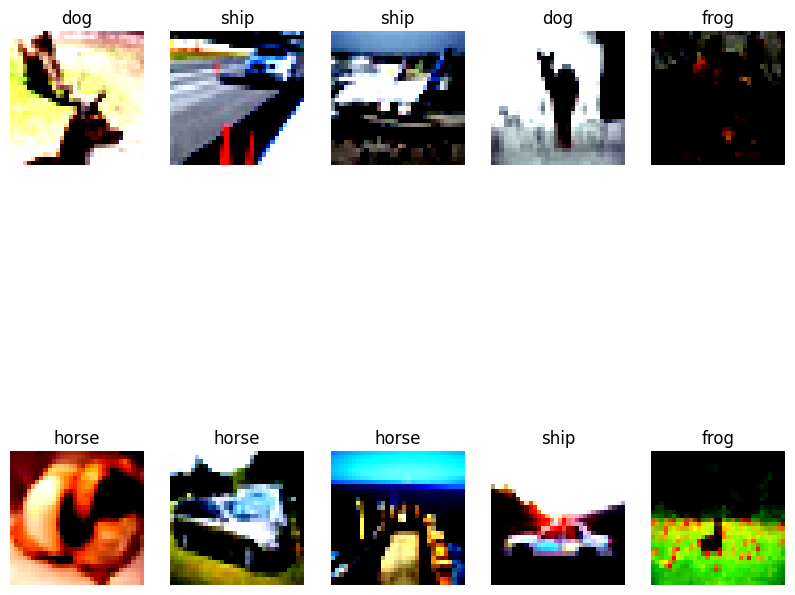

In [11]:

print(f"----****----Wrongly predicted test images: {len(wrongly_predicted_test_images)}")
imageVisualizationHelper.show_images_from_tensor_array(wrongly_predicted_test_images, image_classes, rows=2, cols=5)

# print(f"----****----Correctly predicted test images: {len(correctly_predicted_test_images)}")
# imageVisualizationHelper.show_images_from_tensor_array(correctly_predicted_test_images, image_classes, rows=2, cols=5)


# print(f"----****----Wrongly predicted train images: {len(wrongly_predicted_trained_images)}")
# imageVisualizationHelper.show_images_from_tensor_array(wrongly_predicted_trained_images, image_classes, rows=2, cols=5)

# print(f"----****----Correctly predicted train images: {len(correctly_predicted_trained_images)}")
# imageVisualizationHelper.show_images_from_tensor_array(correctly_predicted_trained_images, image_classes, rows=2, cols=5)
